BANK MARKETING: 
Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.
Business Use Case

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

Project Description

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.
About The Dataset

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



You are provided with following 2 files:

1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.

2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
Dataset Attributes
Here is the description of all the variables:
•	Variable: Definition
•	ID: Unique client ID
•	age: Age of the client
•	job: Type of job
•	marital: Marital status of the client
•	education: Education level
•	default: Credit in default.
•	housing: Housing loan
•	loan: Personal loan
•	contact: Type of communication
•	month: Contact month
•	day_of_week: Day of week of contact
•	duration: Contact duration
•	campaign: number of contacts performed during this campaign to the client
•	pdays: number of days that passed by after the client was last contacted
•	previous: number of contacts performed before this campaign
•	poutcome: outcome of the previous marketing campaign
Output variable (desired target):
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)



Dataset Link-

•	https://github.com/dsrscientist/dataset5
•	https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv
•	https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv



In [137]:
#import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()


# Importing dataset

In [138]:
df_train=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df_train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


We observe that in this data set numerical as well as categorical data is present

In [139]:
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


# Cleaning the data

In [140]:
#checking the null value of  column of dataset
df_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

We observe that there is no null value is present

In [141]:
print("Number of null or missing values in dataset",df_train.isnull().sum().sum())

Number of null or missing values in dataset 0


<Axes: >

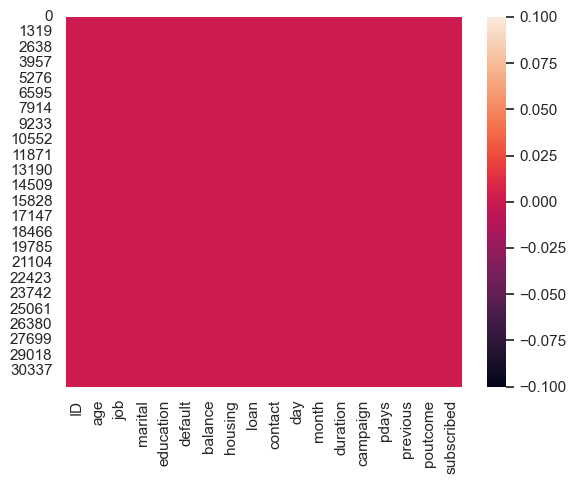

In [142]:
#checking the null value of  column of dataset by heat map
sns.heatmap(df_train.isnull())

we observe that by heatmap there is no null or white space is present

# BASIC INSIGHTS OF DATA

In [143]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


we observe there are all values of all feature have non-null are present

In [144]:
#checking the shape of dataset
df_train.shape

(31647, 18)

we observe there is 31647 row and 18 column are present in this dataset

In [145]:
#checking the column of dataset
df_train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [146]:
# to convert index from row to column
df_train.columns.tolist()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'subscribed']

we observe that there are 17 feature and target is present

# CHECK DATA TYPES AND DATA DISTRIBUTION

In [147]:
#checking the types of column of dataset
df_train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

we observe there is int64 and object two datatypes are present

In [148]:
#checking the unique values of column of dataset
df_train.nunique().to_frame("No. of unique values")

,No. of unique values
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


we observe that in target column two unique value and other have different different unique value are present

In [149]:
#checking the null value of all column of dataset
for i in df_train.columns:
    print(df_train[i].value_counts())
    print("\n")

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64


32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722  

In [150]:

# We will drop some feature it will be useless for our data. 

df_train.drop(['ID'], axis=1, inplace=True)

In [151]:
df_train.drop(['default'], axis=1, inplace=True)

In [152]:
df_train.drop(['duration'], axis=1, inplace=True)

In [153]:
df_train

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,1933,no,no,telephone,19,nov,2,-1,0,unknown,no
1,31,unknown,married,secondary,3,no,no,cellular,20,jul,2,-1,0,unknown,no
2,27,services,married,secondary,891,yes,no,cellular,18,jul,1,-1,0,unknown,no
3,57,management,divorced,tertiary,3287,no,no,cellular,22,jun,1,84,3,success,yes
4,31,technician,married,secondary,119,yes,no,cellular,4,feb,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,0,yes,no,cellular,12,may,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,380,no,yes,cellular,5,jun,2,-1,0,unknown,yes
31644,32,management,single,tertiary,312,no,no,cellular,7,aug,3,-1,0,unknown,no
31645,57,technician,married,secondary,225,yes,no,telephone,15,may,7,337,12,failure,no


In [154]:
df_train.shape

(31647, 15)

we observe 3 column are droped

In [155]:
#checking the null value of  column of dataset
df_train.isnull().sum()

age           0
job           0
marital       0
education     0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

# convert object to int datatype

In [156]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train['job']=le.fit_transform(df_train['job'])
df_train['job']

0         0
1        11
2         7
3         4
4         9
         ..
31642     4
31643     4
31644     4
31645     9
31646     4
Name: job, Length: 31647, dtype: int32

In [157]:
df_train['marital']=le.fit_transform(df_train['marital'])
df_train['marital']

0        1
1        1
2        1
3        0
4        1
        ..
31642    2
31643    0
31644    2
31645    1
31646    0
Name: marital, Length: 31647, dtype: int32

In [158]:
df_train['education']=le.fit_transform(df_train['education'])
df_train['education']

0        3
1        1
2        1
3        2
4        1
        ..
31642    2
31643    2
31644    2
31645    1
31646    1
Name: education, Length: 31647, dtype: int32

In [159]:
df_train['housing']=le.fit_transform(df_train['housing'])
df_train['housing']

0        0
1        0
2        1
3        0
4        1
        ..
31642    1
31643    0
31644    0
31645    1
31646    1
Name: housing, Length: 31647, dtype: int32

In [160]:
df_train['loan']=le.fit_transform(df_train['loan'])
df_train['loan']

0        0
1        0
2        0
3        0
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    0
Name: loan, Length: 31647, dtype: int32

In [161]:
df_train['contact']=le.fit_transform(df_train['contact'])
df_train['contact']

0        1
1        0
2        0
3        0
4        0
        ..
31642    0
31643    0
31644    0
31645    1
31646    0
Name: contact, Length: 31647, dtype: int32

In [162]:
df_train['month']=le.fit_transform(df_train['month'])
df_train['month']

0        9
1        5
2        5
3        6
4        3
        ..
31642    8
31643    6
31644    1
31645    8
31646    5
Name: month, Length: 31647, dtype: int32

In [163]:
df_train['poutcome']=le.fit_transform(df_train['poutcome'])
df_train['poutcome']

0        3
1        3
2        3
3        2
4        3
        ..
31642    3
31643    3
31644    3
31645    0
31646    3
Name: poutcome, Length: 31647, dtype: int32

In [164]:
df_train['subscribed']=le.fit_transform(df_train['subscribed'])
df_train['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int32

# data visualization

0    27932
1     3715
Name: subscribed, dtype: int64


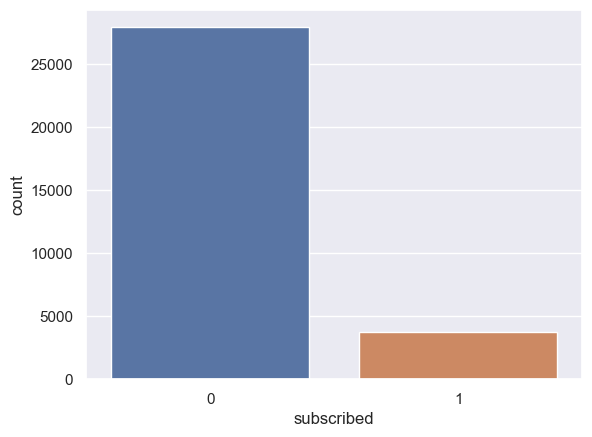

In [165]:
#visualizing the types of glass
ax=sns.countplot(x='subscribed',data=df_train)
print(df_train['subscribed'].value_counts())

WE OBSERVED NEAR ABOUT 4000 PERSONS ARE SUBSCRIBED BUT 28000 ARE NOT SUBSCRIBED

<Axes: xlabel='subscribed', ylabel='job'>

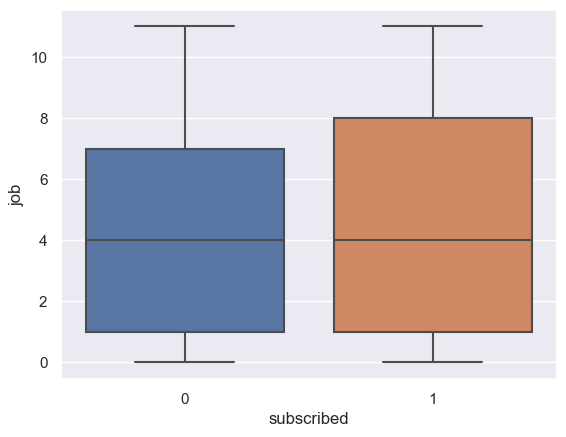

In [166]:
sns.boxplot(x='subscribed',y='job',data=df_train)

we observe that good job holder take more term deposite

<Axes: xlabel='subscribed', ylabel='marital'>

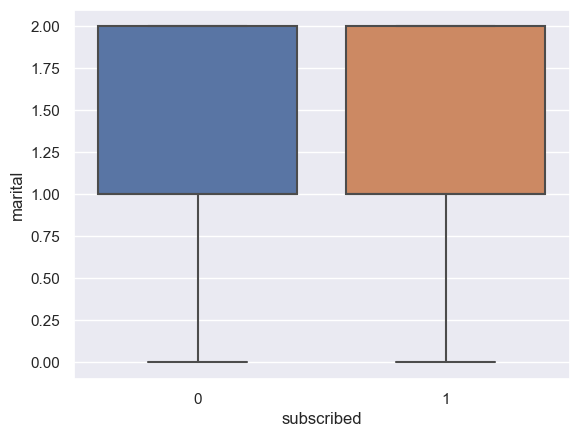

In [167]:
sns.boxplot(x='subscribed',y='marital',data=df_train)

we observe that subscriber and non subscriber both are equal

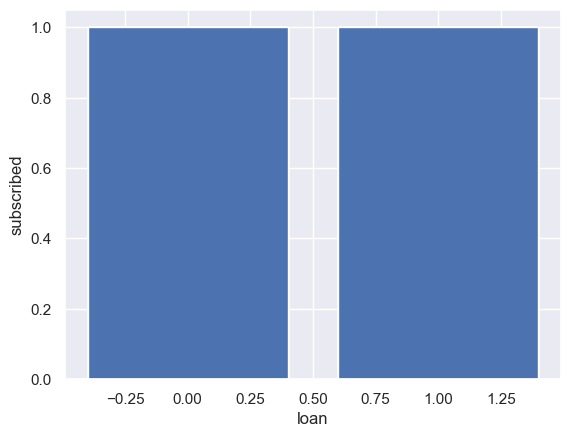

In [168]:
plt.bar(df_train['loan'], df_train['subscribed'])
plt.xlabel('loan')
plt.ylabel('subscribed')
plt.show()

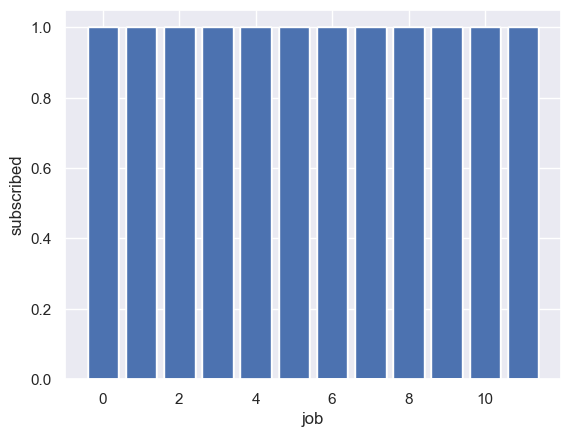

In [169]:
plt.bar(df_train['job'], df_train['subscribed'])
plt.xlabel('job')
plt.ylabel('subscribed')
plt.show()

<Axes: xlabel='subscribed', ylabel='education'>

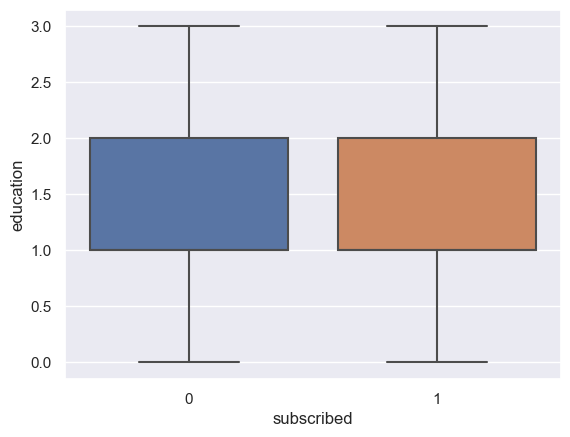

In [170]:
sns.boxplot(x='subscribed',y='education',data=df_train)

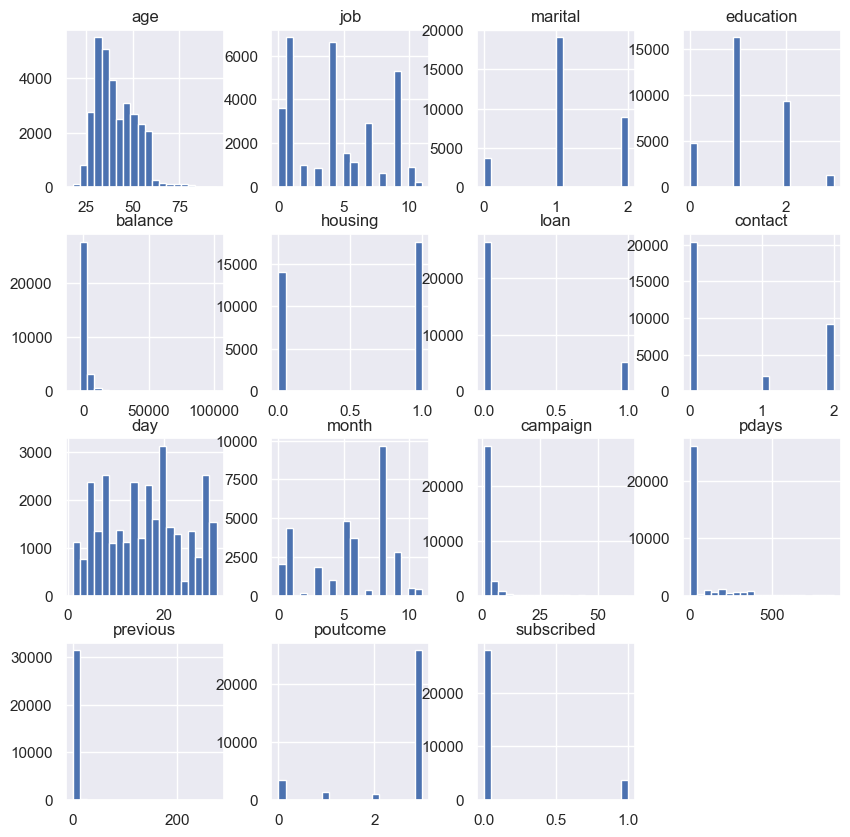

In [171]:
df_train.hist(bins=20, figsize=(10, 10))
plt.show()

WE OBSERVE THAT DATA IS NORMALY DISTRIBUTED

In [172]:
#checking skewness
df_train.skew()

age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

In [173]:
df_train['age']=np.cbrt(df_train['age'])

In [174]:
df_train['balance']=np.cbrt(df_train['balance'])

In [175]:
df_train['loan']=np.cbrt(df_train['loan'])

In [176]:
df_train['contact']=np.cbrt(df_train['contact'])

In [177]:
df_train['campaign']=np.cbrt(df_train['campaign'])

In [178]:
df_train['pdays']=np.cbrt(df_train['pdays'])

In [179]:
df_train['previous']=np.cbrt(df_train['previous'])

In [180]:
#checking skewness
df_train.skew()

age           0.286363
job           0.264817
marital      -0.100071
education     0.199441
balance      -0.086014
housing      -0.223918
loan          1.833474
contact       0.637383
day           0.087185
month        -0.486498
campaign      1.667938
pdays         1.779036
previous      2.079738
poutcome     -1.996421
subscribed    2.377445
dtype: float64

# Exploratory data analysis

In [181]:
df_train.describe()

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,3.422106,4.332923,1.167220,1.225013,7.456890,0.555629,0.162132,0.430034,15.835466,5.533131,1.304468,0.239014,0.245456,2.566152,0.117389
std,0.291863,3.271868,0.607186,0.749195,6.598377,0.496904,0.368578,0.583162,8.337097,3.004247,0.348530,2.684057,0.546554,0.982069,0.321888
min,2.620741,0.000000,0.000000,0.000000,-20.015821,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,3.207534,1.000000,1.000000,1.000000,4.179339,0.000000,0.000000,0.000000,8.000000,3.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,3.391211,4.000000,1.000000,1.000000,7.663094,1.000000,0.000000,0.000000,16.000000,6.000000,1.259921,-1.000000,0.000000,3.000000,0.000000
75%,3.634241,7.000000,2.000000,2.000000,11.268857,1.000000,0.000000,1.259921,21.000000,8.000000,1.442250,-1.000000,0.000000,3.000000,0.000000
max,4.562903,11.000000,2.000000,3.000000,46.742671,1.000000,1.000000,1.259921,31.000000,11.000000,3.979057,9.550059,6.502957,3.000000,1.000000


This gives the all statical information of the numerical columns.

There is no negative or invalid value is present hence we can say

that it is perfect we can obserbe these points:

    1.The counts of all columns are same it means there is no missing value in any column 
    2.The mean value is same as median(50%) in all feature 
    where mean and median are equal it meance this data set is normaly distributed 
    
    3.There no any columns in which mean value is less than median(50%) hence there no right skewed 
    4.There is major difference beteen 75% and max in age and balanced it means the outliers are present in these columns 
    5.In this discription min,std and 25% detail also found
 

In [182]:
df_train.groupby('subscribed').mean()

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
subscribed,,,,,,,,,,,,,,
0,3.421115,4.286481,1.157024,1.206967,7.223217,0.581197,0.171846,0.460675,15.925462,5.563905,1.314908,0.089686,0.211989,2.595124
1,3.429557,4.682100,1.243876,1.360700,9.213808,0.363392,0.089098,0.199658,15.158816,5.301750,1.225976,1.361765,0.497090,2.348318


In [183]:
df_train.groupby('age').mean()

,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,subscribed
age,,,,,,,,,,,,,,
2.620741,8.000000,2.000000,2.000000,6.365861,0.000000,0.000000,0.250000,9.875000,4.375000,1.193687,0.502737,0.323425,2.625000,0.625000
2.668402,8.000000,2.000000,1.409091,7.061226,0.000000,0.000000,0.090909,13.000000,5.000000,1.329368,0.743887,0.328273,2.500000,0.318182
2.714418,6.846154,1.923077,1.589744,7.038598,0.256410,0.076923,0.328704,15.435897,5.333333,1.236329,1.116985,0.489889,2.230769,0.358974
2.758924,5.687500,1.937500,1.125000,7.871775,0.291667,0.104167,0.487062,14.854167,5.791667,1.189276,0.528230,0.311503,2.562500,0.312500
2.802039,5.848837,1.953488,1.220930,7.358550,0.441860,0.093023,0.485558,14.267442,6.174419,1.210306,0.436390,0.286698,2.616279,0.290698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.481405,5.000000,0.000000,0.000000,8.929490,0.000000,0.000000,1.000000,3.000000,7.000000,1.000000,-1.000000,0.000000,3.000000,1.000000
4.514357,5.000000,1.000000,3.000000,9.185453,0.000000,0.000000,0.000000,22.000000,10.000000,1.442250,-1.000000,0.000000,3.000000,1.000000
4.530655,5.000000,1.000000,3.000000,9.185453,0.000000,0.000000,0.000000,4.000000,1.000000,1.259921,2.351335,2.080084,2.000000,1.000000


There are a couple of points that should be noted from the statistical overview. They are..

About the subscribed rate, age is more subscribe rate will increase

# Correlation Matrix and Heatmap

In [184]:
df_train.corr()

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.027208,-0.423149,-0.101250,0.097645,-0.168935,-0.008282,0.054808,-0.008998,-0.038968,0.023006,-0.011360,-0.000488,0.008563,0.009310
job,-0.027208,1.000000,0.066124,0.170347,0.030541,-0.125347,-0.039049,-0.076253,0.020951,-0.089384,0.004734,-0.007784,0.000043,0.007101,0.038921
marital,-0.423149,0.066124,1.000000,0.107547,0.029260,-0.017846,-0.041654,-0.041858,-0.007686,-0.003834,-0.020674,0.025247,0.026130,-0.019770,0.046043
education,-0.101250,0.170347,0.107547,1.000000,0.075759,-0.095376,-0.045950,-0.115748,0.017902,-0.055967,-0.001402,0.020848,0.029767,-0.019007,0.066051
balance,0.097645,0.030541,0.029260,0.075759,1.000000,-0.087058,-0.142789,-0.038474,-0.011106,-0.002360,-0.035939,0.060453,0.070936,-0.055961,0.097107
housing,-0.168935,-0.125347,-0.017846,-0.095376,-0.087058,1.000000,0.036244,0.176243,-0.025666,0.271442,-0.033177,0.081725,0.053207,-0.092677,-0.141092
loan,-0.008282,-0.039049,-0.041654,-0.045950,-0.142789,0.036244,1.000000,-0.011394,0.014769,0.024186,0.006838,-0.025042,-0.025072,0.010919,-0.072266
contact,0.054808,-0.076253,-0.041858,-0.115748,-0.038474,0.176243,-0.011394,1.000000,-0.023095,0.351713,0.024199,-0.270693,-0.260850,0.261455,-0.144073
day,-0.008998,0.020951,-0.007686,0.017902,-0.011106,-0.025666,0.014769,-0.023095,1.000000,-0.000604,0.164516,-0.084394,-0.078785,0.077586,-0.029600
month,-0.038968,-0.089384,-0.003834,-0.055967,-0.002360,0.271442,0.024186,0.351713,-0.000604,1.000000,-0.132575,0.028869,0.032273,-0.029369,-0.028088


Text(0.5, 1.0, 'Correlations Among Features')

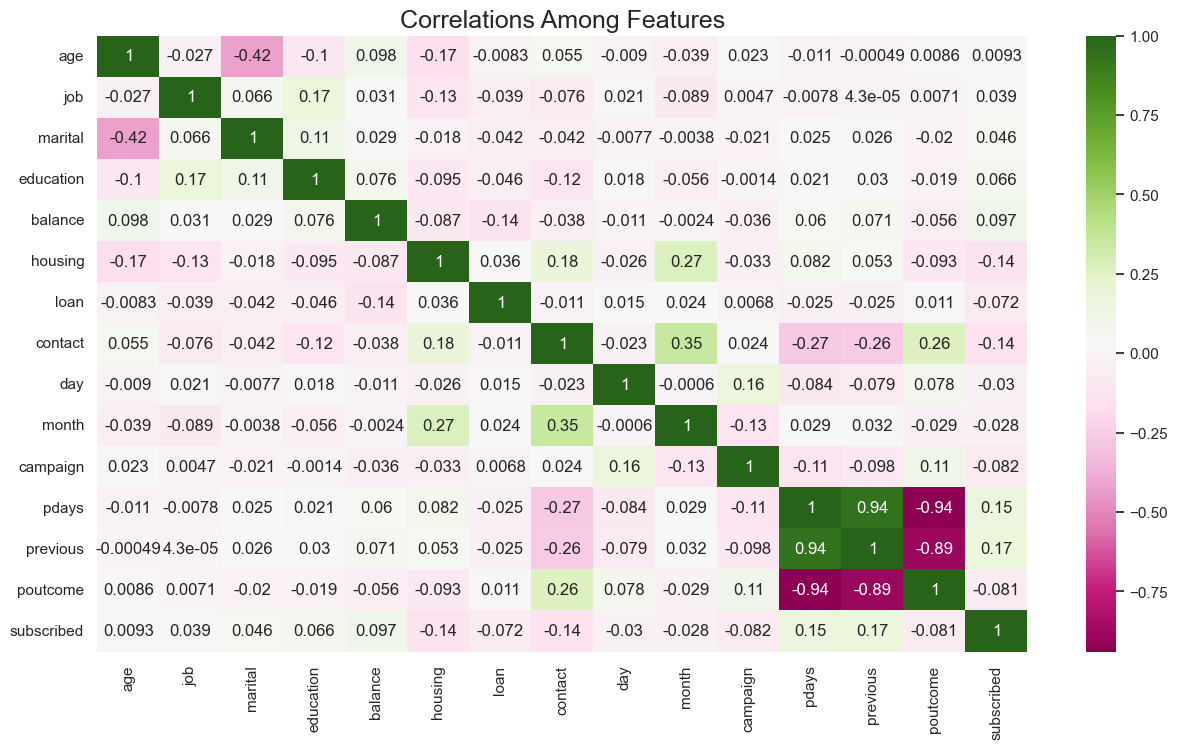

In [185]:
plt.subplots(figsize = (15,8))
sns.heatmap(df_train.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 18)

we observe that in this dataset features are not more correlated

marital and subscribed

([<matplotlib.axis.XTick at 0x13b913edf60>,
 [Text(0, 0, 'married'), Text(1, 0, 'single'), Text(2, 0, 'divorced')])

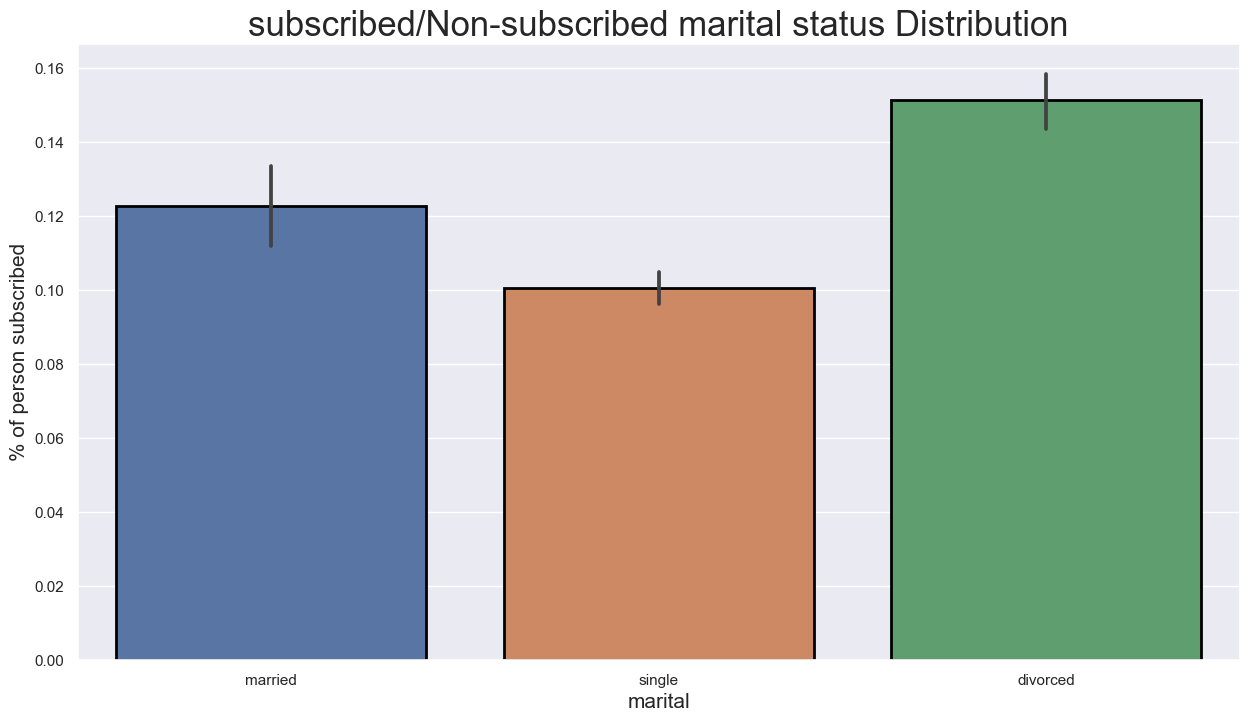

In [186]:
plt.subplots(figsize = (15,8))
sns.barplot(x = "marital", y = "subscribed", data=df_train, edgecolor=(0,0,0), linewidth=2)
plt.title("subscribed/Non-subscribed marital status Distribution", fontsize = 25)
labels = ['married','single', 'divorced']
plt.ylabel("% of person subscribed", fontsize = 15)
plt.xlabel("marital",fontsize = 15)
plt.xticks(sorted(df_train.marital.unique()), labels)

This bar plot above shows the distribution of married,single and divorced subscribed. The x_label shows martial status
and the y_label shows % of person subscribed. This bar plot shows that most divorced person subscribe ,second married person subscribed but single person least subscribed.

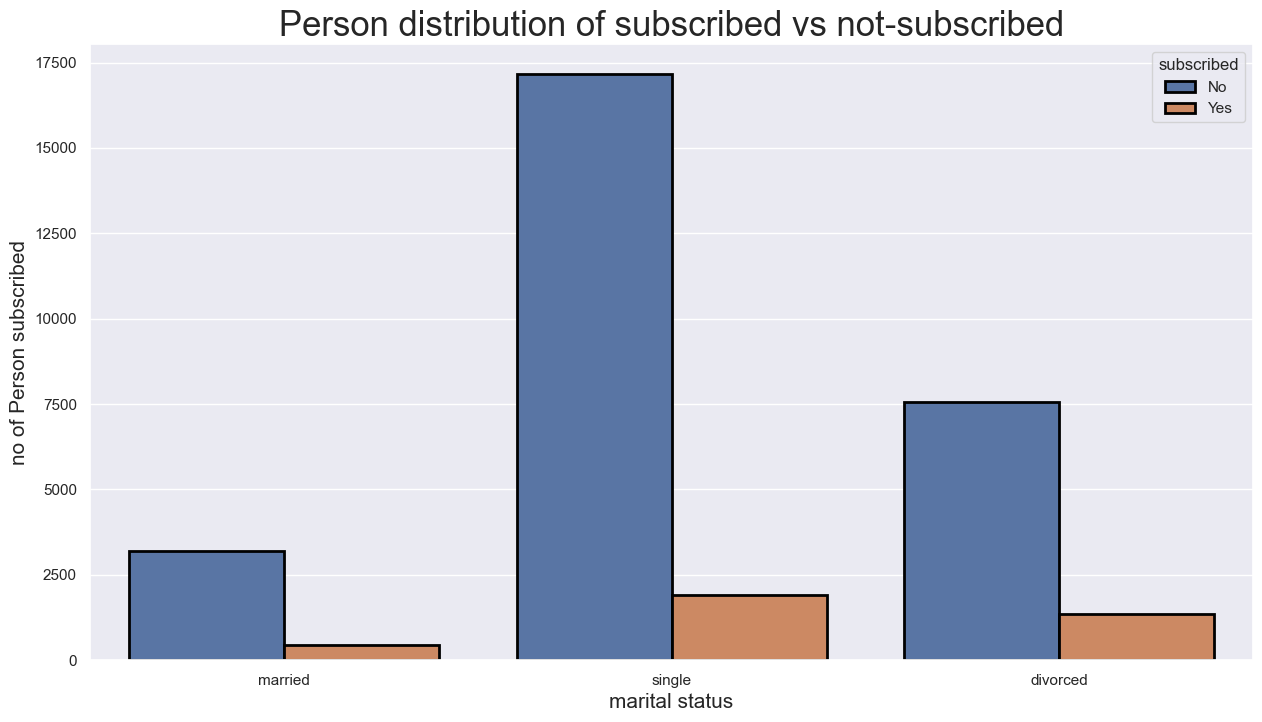

In [187]:
sns.set(style='darkgrid')
plt.subplots(figsize = (15,8))
ax=sns.countplot(x='marital',data=df_train,hue='subscribed',edgecolor=(0,0,0),linewidth=2)
df_train.shape
## Fixing title, xlabel and ylabel
plt.title('Person distribution of subscribed vs not-subscribed',fontsize=25)
plt.xlabel('marital status',fontsize=15)
plt.ylabel("no of Person subscribed", fontsize = 15)
labels = ['married','single', 'divorced']
#Fixing xticks.
plt.xticks(sorted(df_train.marital.unique()),labels)
## Fixing legends
leg = ax.get_legend()
leg.set_title('subscribed')
legs=leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')

This count plot shows the actual distribution of in this we observe that more persons were not subscribed

In [188]:
df_train

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,subscribed
0,3.825862,0,1,3,12.456918,0,0.0,1.0,19,9,1.259921,-1.000000,0.000000,3,0
1,3.141381,11,1,1,1.442250,0,0.0,0.0,20,5,1.259921,-1.000000,0.000000,3,0
2,3.000000,7,1,1,9.622603,1,0.0,0.0,18,5,1.000000,-1.000000,0.000000,3,0
3,3.848501,4,0,2,14.868480,0,0.0,0.0,22,6,1.000000,4.379519,1.442250,2,1
4,3.141381,9,1,1,4.918685,1,0.0,0.0,4,3,1.000000,-1.000000,0.000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,3.072317,4,2,2,0.000000,1,0.0,0.0,12,8,1.259921,-1.000000,0.000000,3,0
31643,3.756286,4,0,2,7.243156,0,1.0,0.0,5,6,1.259921,-1.000000,0.000000,3,1
31644,3.174802,4,2,2,6.782423,0,0.0,0.0,7,1,1.442250,-1.000000,0.000000,3,0
31645,3.848501,9,1,1,6.082202,1,0.0,1.0,15,8,1.912931,6.958943,2.289428,0,0


In [189]:
correlations = df_train.corr()['subscribed'].sort_values(ascending=False)
print(correlations)

subscribed    1.000000
previous      0.167908
pdays         0.152555
balance       0.097107
education     0.066051
marital       0.046043
job           0.038921
age           0.009310
month        -0.028088
day          -0.029600
loan         -0.072266
poutcome     -0.080895
campaign     -0.082134
housing      -0.141092
contact      -0.144073
Name: subscribed, dtype: float64


no data is skewed

<Axes: >

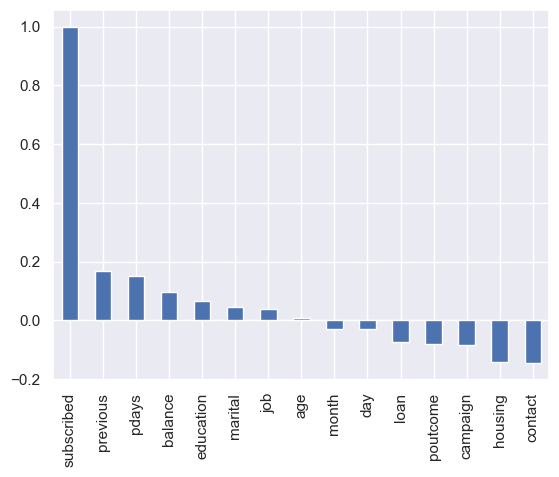

In [190]:
correlations.plot(kind='bar')

we observe that half feature are positively correlated and half are negatively with target

# Separating feature and target

In [191]:
x=df_train.drop("subscribed", axis= 1)
y=df_train["subscribed"]

# Feature Scaling using Standard Scalarization

In [192]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,1.383398,-1.324317,-0.275405,2.369229,0.757778,-1.118201,-0.439893,0.977386,0.379579,1.154007,-0.127816,-0.461627,-0.449105,0.441777
1,-0.961854,2.037729,-0.275405,-0.300345,-0.911548,-1.118201,-0.439893,-0.737430,0.499526,-0.177462,-0.127816,-0.461627,-0.449105,0.441777
2,-1.446270,0.815167,-0.275405,-0.300345,0.328224,0.894294,-0.439893,-0.737430,0.259631,-0.177462,-0.873593,-0.461627,-0.449105,0.441777
3,1.460966,-0.101755,-1.922374,1.034442,1.123262,-1.118201,-0.439893,-0.737430,0.739422,0.155405,-0.873593,1.542654,2.189741,-0.576498
4,-0.961854,1.426448,-0.275405,-0.300345,-0.384677,0.894294,-0.439893,-0.737430,-1.419637,-0.843197,-0.873593,-0.461627,-0.449105,0.441777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,-1.198489,-0.101755,1.371563,1.034442,-1.130128,0.894294,-0.439893,-0.737430,-0.460055,0.821140,-0.127816,-0.461627,-0.449105,0.441777
31643,1.145007,-0.101755,-1.922374,1.034442,-0.032392,-1.118201,2.273280,-0.737430,-1.299690,0.155405,-0.127816,-0.461627,-0.449105,0.441777
31644,-0.847342,-0.101755,1.371563,1.034442,-0.102219,-1.118201,-0.439893,-0.737430,-1.059794,-1.508931,0.395329,-0.461627,-0.449105,0.441777
31645,1.460966,1.426448,-0.275405,-0.300345,-0.208341,0.894294,-0.439893,0.977386,-0.100212,0.821140,1.745828,2.503686,3.739801,-2.613048


we scale the data to overcome biasness

# checking variance inflation Factor(vif)

In [193]:
#find vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"] =[variance_inflation_factor(x.values, i)
                    for i in range (len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.301792,age
1,1.050267,job
2,1.245334,marital
3,1.066743,education
4,1.051917,balance
5,1.178731,housing
6,1.028172,loan
7,1.303283,contact
8,1.037939,day
9,1.250787,month


we observe by checking vif values the feature not causing multicollineraity problem. in no any one have vif is not
more than 10 so no need to drop any feature.
and there no multicollineraity problem .

In [194]:
y.value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

oversampling

In [195]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [196]:
y1.value_counts()

0    27932
1    27932
Name: subscribed, dtype: int64

we observe that all features are balanced

# Model Creation

Finding the best random state

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [198]:
maxAccu = 0
maxRS = 0
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = 200)
RFR = RandomForestClassifier()
RFR.fit(x_train, y_train)
pred = RFR.predict(x_test)
acc = accuracy_score(y_test, pred)
if acc>maxAccu:
        maxAccu = acc
        maxRS  = 200
print("Best accuracy is =",  maxAccu, "at random_state ", maxRS) 




Best accuracy is = 0.9389021479713604 at random_state  200


we observe the best accuracy is 93.66% at random_state 200

# creat train test split

In [199]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = 200)

# classification algorithms

In [200]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [201]:
# checking accuracy for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC= RFC.predict(x_test)
print(accuracy_score(y_test, predRFC)) 
print(confusion_matrix(y_test, predRFC)) 
print(classification_report(y_test, predRFC))

0.9396778042959427
[[7916  421]
 [ 590 7833]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      8337
           1       0.95      0.93      0.94      8423

    accuracy                           0.94     16760
   macro avg       0.94      0.94      0.94     16760
weighted avg       0.94      0.94      0.94     16760



we observe that RandomForestClassifier accuracy 93.96%

# LogisticRegression

In [202]:
# checking accuracy for LogisticRegression
LR = RandomForestClassifier()
LR.fit(x_train, y_train)
predLR= LR.predict(x_test)
print(accuracy_score(y_test, predLR)) 
print(confusion_matrix(y_test, predLR)) 
print(classification_report(y_test, predLR))

0.9398568019093079
[[7906  431]
 [ 577 7846]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      8337
           1       0.95      0.93      0.94      8423

    accuracy                           0.94     16760
   macro avg       0.94      0.94      0.94     16760
weighted avg       0.94      0.94      0.94     16760



we observe that LogisticRegression acuracy 93.98%

# GradientBoostingClassifier

In [203]:
# checking accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB= GB.predict(x_test)
print(accuracy_score(y_test, predGB)) 
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.886873508353222
[[7833  504]
 [1392 7031]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      8337
           1       0.93      0.83      0.88      8423

    accuracy                           0.89     16760
   macro avg       0.89      0.89      0.89     16760
weighted avg       0.89      0.89      0.89     16760



we observe that GradientBoostingClassifier accuracy 88.68%

# ExtraTreeClassifier

In [204]:
# checking accuracy for ExtraTreeClassifier
ET = ExtraTreeClassifier()
ET.fit(x_train, y_train)
predET= ET.predict(x_test)
print(accuracy_score(y_test, predET)) 
print(confusion_matrix(y_test, predET)) 
print(classification_report(y_test, predET))

0.854653937947494
[[6992 1345]
 [1091 7332]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      8337
           1       0.84      0.87      0.86      8423

    accuracy                           0.85     16760
   macro avg       0.86      0.85      0.85     16760
weighted avg       0.85      0.85      0.85     16760



we observe that ExtraTreeClassifier accuracy 85.54%

# Cross Validation Score

In [205]:
from sklearn.model_selection import cross_val_score

In [206]:
cv=5--- it a fold value 1,2,3,4,5
cross_val_score(modelname, features, targetvariable, cv=foldvalue, scoring='accuracy')


in classification algorithms- default scoring parameter- accuracy
for regression- deafult scoring parameter is - r2 score

SyntaxError: invalid syntax (3428808835.py, line 1)

In [207]:
# checking cv score for Random Forest Classifier
score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predRFC) - score.mean())

[0.89336493 0.89447077 0.89161005 0.89176805 0.89176805]
0.8925963711264654
Difference between Accuracy score and cross validation score is - 0.04708143316947733


In [208]:
# checking cv score for LogisticRegression
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predLR) - score.mean())

[0.89336493 0.89494471 0.89113604 0.89176805 0.89176805]
0.8925963561498925
Difference between Accuracy score and cross validation score is - 0.04726044575941535


In [209]:
# checking cv score for GradientBoostingClassifier
score = cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predGB) - score.mean())

[0.89210111 0.89636651 0.89208406 0.89208406 0.89208406]
0.8929439574146143
Difference between Accuracy score and cross validation score is - -0.0060704490613923134


In [210]:
# checking cv score for ExtraTreeClassifier
score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predET) - score.mean())

[0.82890995 0.82985782 0.82904092 0.833149   0.83062095]
0.8303157286215039
Difference between Accuracy score and cross validation score is - 0.024338209325990068


Gradient Boosting Classifier is our best model as the difference between accuracy score and cross validation score
is =-0.0060704490613923134 and this is least out of all

finaly we observe that Gradient Boosting Classifier is our best model

# Hyper Parameter Tuning

In [211]:
# Gradient Boosting Classifier
from sklearn.model_selection import GridSearchCV

parameters={'loss': ['log_loss','exponential'],
            'learning_rate':[0.1,0.2,0.3],
            'n_estimators':[100,200,300],
            'subsample':[0.0,1.0,2.0],
            'min_samples_split':[2,3,4]
            }

In [212]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters, cv =5)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_

In [214]:
Final_model = GradientBoostingClassifier(loss =  'log_loss', learning_rate = 0.2, n_estimators = 200, subsample = 1.0, min_samples_split = 2)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

92.9474940334129


after Hyper Parameter Tuning the accuracy increase from 88.68% to 92.94

# Plotting ROC compare auc for all the models used

In [215]:
#Plotting ROC compare auc for all the models used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

Plotting ROC compare auc for best model

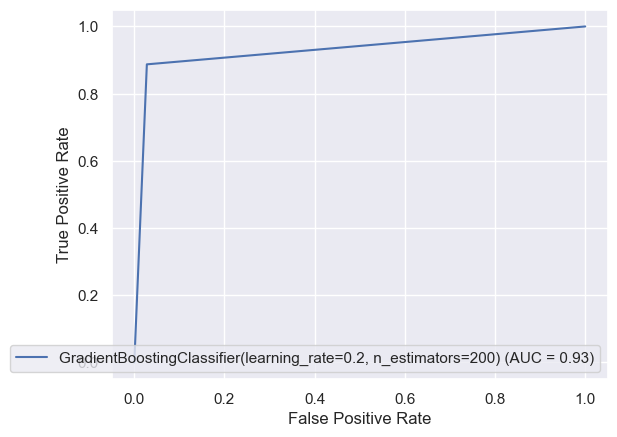

In [216]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)
display.plot()

# Saving the model

In [217]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model,"BANK_MARKETING_Subscribe_To_Term_Deposit_or_not_Prediction_Project_Analysis.pkl")

['BANK_MARKETING_Subscribe_To_Term_Deposit_or_not_Prediction_Project_Analysis.pkl']

# predicting the saved model

In [218]:
# first we load the saved model and get prediction
model = joblib.load("BANK_MARKETING_Subscribe_To_Term_Deposit_or_not_Prediction_Project_Analysis.pkl")

#prediction
prediction = model.predict(x_test)
prediction

array([1, 1, 0, ..., 0, 1, 1])

# these are the prediction for survived 

In [219]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
16755,0,0
16756,1,1
16757,0,0
16758,1,1


# importing test dataset

In [220]:
df_test=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [221]:
df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


# Cleaning the data

In [222]:
#checking the null value of  column of dataset
df_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

<Axes: >

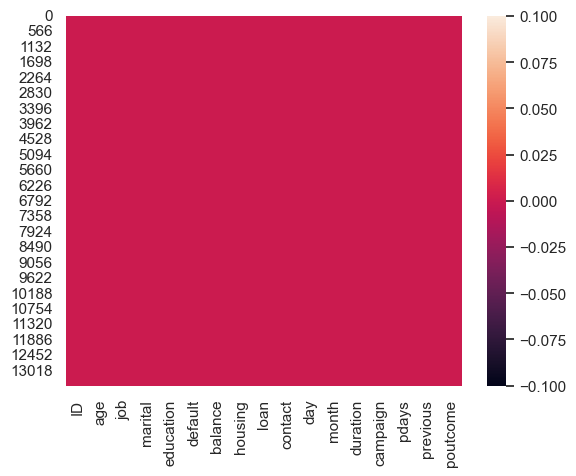

In [223]:
#checking the null value of  column of dataset by heat map
sns.heatmap(df_test.isnull())

In [224]:
print("Number of null or missing values in dataset",df_test.isnull().sum().sum())

Number of null or missing values in dataset 0


<Axes: >

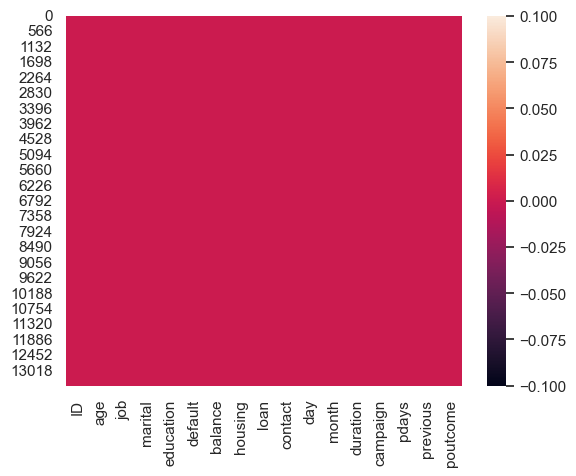

In [225]:
#checking the null value of  column of dataset by heat map
sns.heatmap(df_test.isnull())

In [226]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [227]:
#checking the unique values of column of dataset
df_test.nunique().to_frame("No. of unique values")

,No. of unique values
ID,13564
age,75
job,12
marital,3
education,4
default,2
balance,4292
housing,2
loan,2
contact,3


In [228]:
#checking the shape of dataset
df_test.shape

(13564, 17)

In [229]:
#checking the column of dataset
df_test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [230]:
# to convert index from row to column
df_test.columns.tolist()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

convert object to int datatype

In [231]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_test['job']=le.fit_transform(df_test['job'])
df_test['job']

0        7
1        5
2        6
3        7
4        1
        ..
13559    4
13560    1
13561    5
13562    0
13563    0
Name: job, Length: 13564, dtype: int32

In [232]:
df_test['marital']=le.fit_transform(df_test['marital'])
df_test['marital']

0        1
1        0
2        2
3        2
4        0
        ..
13559    1
13560    1
13561    1
13562    2
13563    1
Name: marital, Length: 13564, dtype: int32

In [233]:
df_test['education']=le.fit_transform(df_test['education'])
df_test['education']

0        1
1        0
2        2
3        0
4        1
        ..
13559    2
13560    0
13561    0
13562    1
13563    1
Name: education, Length: 13564, dtype: int32

In [234]:
df_test['housing']=le.fit_transform(df_test['housing'])
df_test['housing']

0        1
1        0
2        1
3        1
4        0
        ..
13559    0
13560    1
13561    1
13562    0
13563    1
Name: housing, Length: 13564, dtype: int32

In [235]:
df_test['balance']=le.fit_transform(df_test['balance'])
df_test['balance']

0         682
1        2809
2         708
3        3226
4          94
         ... 
13559     609
13560    2535
13561     849
13562    1028
13563     566
Name: balance, Length: 13564, dtype: int64

In [236]:
df_test['loan']=le.fit_transform(df_test['loan'])
df_test['loan']

0        0
1        0
2        0
3        0
4        1
        ..
13559    0
13560    0
13561    0
13562    0
13563    0
Name: loan, Length: 13564, dtype: int32

In [237]:
df_test['contact']=le.fit_transform(df_test['contact'])
df_test['contact']

0        0
1        1
2        2
3        1
4        2
        ..
13559    0
13560    2
13561    0
13562    0
13563    0
Name: contact, Length: 13564, dtype: int32

In [238]:
df_test['month']=le.fit_transform(df_test['month'])
df_test['month']

0        8
1        5
2        8
3        8
4        5
        ..
13559    1
13560    6
13561    4
13562    9
13563    8
Name: month, Length: 13564, dtype: int32

In [239]:
df_test['poutcome']=le.fit_transform(df_test['poutcome'])
df_test['poutcome']

0        3
1        3
2        3
3        3
4        3
        ..
13559    3
13560    3
13561    3
13562    2
13563    0
Name: poutcome, Length: 13564, dtype: int32

In [240]:
# We will drop some feature it will be useless for our data. 

df_test.drop(['ID'], axis=1, inplace=True)

In [241]:
df_test.drop(['default'], axis=1, inplace=True)

In [242]:
df_test.drop(['duration'], axis=1, inplace=True)

In [243]:
df_test

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,32,7,1,1,682,1,0,0,15,8,6,-1,0,3
1,78,5,0,0,2809,0,0,1,1,5,1,-1,0,3
2,31,6,2,2,708,1,0,2,16,8,1,-1,0,3
3,57,7,2,0,3226,1,0,1,13,8,2,-1,0,3
4,45,1,0,1,94,0,1,2,3,5,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,609,0,0,0,28,1,4,-1,0,3
13560,54,1,1,0,2535,1,0,2,20,6,1,-1,0,3
13561,35,5,1,0,849,1,0,0,29,4,1,-1,0,3
13562,29,0,2,1,1028,0,0,0,9,9,2,91,3,2


In [244]:
#checking skewness
df_test.skew()

age          0.692404
job          0.254647
marital     -0.109220
education    0.192137
balance      1.151163
housing     -0.226771
loan         1.898587
contact      0.794849
day          0.106806
month       -0.465848
campaign     4.958236
pdays        2.555601
previous     8.704583
poutcome    -1.921847
dtype: float64

In [245]:
df_test['age']=np.cbrt(df_test['age'])

In [246]:
df_test['balance']=np.cbrt(df_test['balance'])

In [247]:
df_test['loan']=np.cbrt(df_test['loan'])

In [248]:
df_test['contact']=np.cbrt(df_test['contact'])

In [249]:
df_test['campaign']=np.cbrt(df_test['campaign'])

In [250]:
df_test['pdays']=np.cbrt(df_test['pdays'])

In [251]:
df_test['previous']=np.cbrt(df_test['previous'])

In [252]:
#checking skewness
df_test.skew()

age          0.286833
job          0.254647
marital     -0.109220
education    0.192137
balance      0.348019
housing     -0.226771
loan         1.898587
contact      0.674128
day          0.106806
month       -0.465848
campaign     1.618080
pdays        1.722786
previous     2.005334
poutcome    -1.921847
dtype: float64

data is normaly distributed

In [253]:
df_test.describe()

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.00000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,3.420179,4.355721,1.168903,1.224344,10.615523,0.556326,0.15578,0.420295,15.738646,5.499410,1.304494,0.287802,0.254333,2.545562
std,0.291543,3.274561,0.610680,0.745224,2.581313,0.496836,0.36266,0.580047,8.288174,3.013095,0.347264,2.733363,0.555089,1.005069
min,2.620741,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,3.207534,1.000000,1.000000,1.000000,8.595238,0.000000,0.00000,0.000000,8.000000,3.000000,1.000000,-1.000000,0.000000,3.000000
50%,3.391211,4.000000,1.000000,1.000000,10.029910,1.000000,0.00000,0.000000,16.000000,6.000000,1.259921,-1.000000,0.000000,3.000000
75%,3.634241,7.000000,2.000000,2.000000,12.433783,1.000000,0.00000,1.259921,21.000000,8.000000,1.442250,-1.000000,0.000000,3.000000
max,4.562903,11.000000,2.000000,3.000000,16.249980,1.000000,1.00000,1.259921,31.000000,11.000000,3.870877,9.472682,3.802952,3.000000


In [254]:
df_test.corr()

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
age,1.000000,-0.032767,-0.414757,-0.116723,0.111474,-0.173586,-0.018940,0.053361,-0.005235,-0.051402,0.021598,-0.011146,-0.003130,0.008946
job,-0.032767,1.000000,0.052579,0.158185,0.017272,-0.125409,-0.018603,-0.089144,0.027381,-0.100924,0.021010,-0.014309,-0.001979,0.020020
marital,-0.414757,0.052579,1.000000,0.110982,0.015718,-0.012039,-0.059223,-0.039922,0.000419,-0.014271,-0.015295,0.017896,0.018677,-0.010196
education,-0.116723,0.158185,0.110982,1.000000,0.065725,-0.080032,-0.054845,-0.112102,0.033917,-0.060441,0.008466,0.021949,0.033163,-0.020194
balance,0.111474,0.017272,0.015718,0.065725,1.000000,-0.089277,-0.142719,-0.030583,0.006378,0.006339,-0.029507,0.057092,0.070219,-0.051345
housing,-0.173586,-0.125409,-0.012039,-0.080032,-0.089277,1.000000,0.053394,0.155966,-0.033407,0.271594,-0.039102,0.105705,0.074290,-0.116616
loan,-0.018940,-0.018603,-0.059223,-0.054845,-0.142719,0.053394,1.000000,-0.015747,0.003121,0.017189,0.004450,-0.035873,-0.034665,0.025735
contact,0.053361,-0.089144,-0.039922,-0.112102,-0.030583,0.155966,-0.015747,1.000000,-0.024443,0.346420,0.015314,-0.269934,-0.258038,0.261435
day,-0.005235,0.027381,0.000419,0.033917,0.006378,-0.033407,0.003121,-0.024443,1.000000,-0.018811,0.173947,-0.104966,-0.095851,0.096803
month,-0.051402,-0.100924,-0.014271,-0.060441,0.006339,0.271594,0.017189,0.346420,-0.018811,1.000000,-0.149786,0.043228,0.042532,-0.041551


Text(0.5, 1.0, 'Correlations Among Features')

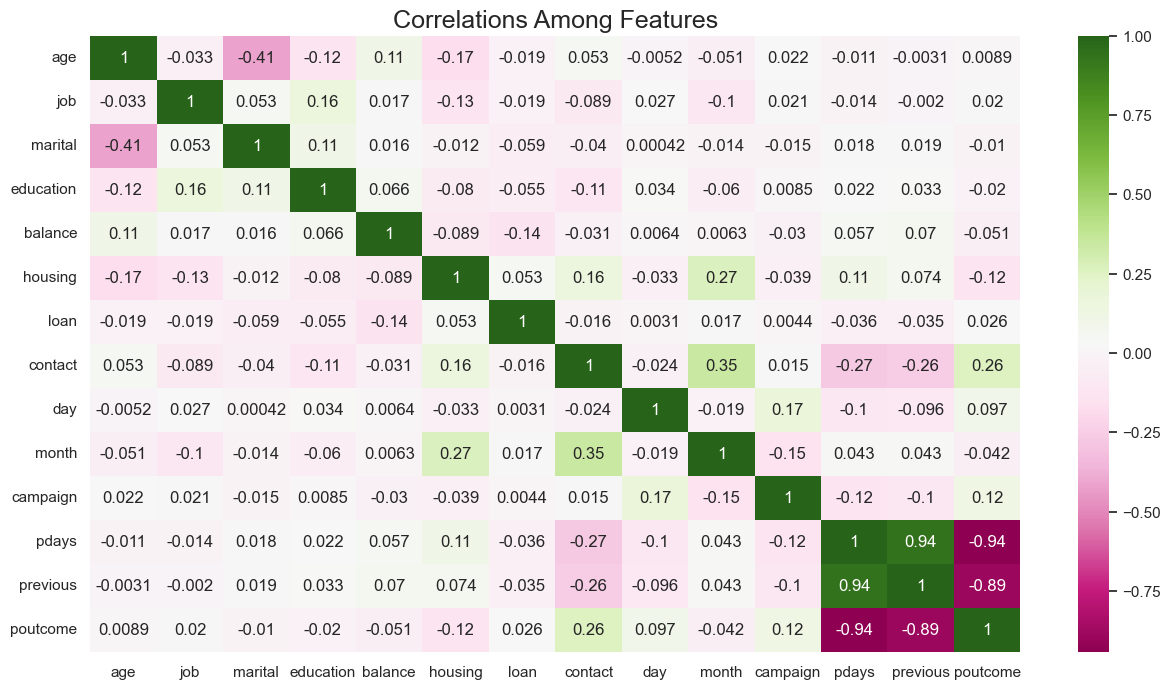

In [255]:
plt.subplots(figsize = (15,8))
sns.heatmap(df_test.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 18)

pdays and previous are more correlated

# Feature Scaling using Standard Scalarization

In [256]:
df_test.shape

(13564, 14)

In [257]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1=pd.DataFrame(scaler.fit_transform(x1), columns = x1.columns)
x1

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,1.281900,-1.408723,-0.331438,2.363349,0.694228,-0.943487,-0.38744,1.26543,0.426352,1.139081,-0.019356,-0.581271,-0.568257,0.527702
1,-0.895688,2.057637,-0.331438,-0.394965,-1.108038,-0.943487,-0.38744,-0.60776,0.548636,-0.137559,-0.019356,-0.581271,-0.568257,0.527702
2,-1.345472,0.797142,-0.331438,-0.394965,0.230466,1.063996,-0.38744,-0.60776,0.304068,-0.137559,-0.849182,-0.581271,-0.568257,0.527702
3,1.353922,-0.148229,-1.957168,0.984192,1.088818,-0.943487,-0.38744,-0.60776,0.793204,0.181601,-0.849182,1.232499,1.749974,-0.471345
4,-0.895688,1.427389,-0.331438,-0.394965,-0.539209,1.063996,-0.38744,-0.60776,-1.407909,-0.775879,-0.849182,-0.581271,-0.568257,0.527702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55859,-1.208131,-0.713004,1.294292,0.984192,0.049092,-0.943487,-0.38744,-0.60776,1.430030,1.076901,0.562747,1.482249,1.923223,-0.471345
55860,-0.957422,0.134828,1.294292,0.984192,0.085976,1.063996,-0.38744,-0.60776,0.304068,0.702708,-0.849182,-0.581271,-0.568257,0.527702
55861,-1.206939,-1.408723,1.294292,-0.394965,-0.159771,-0.943487,-0.38744,-0.60776,1.714655,-1.733359,-0.849182,-0.581271,-0.568257,0.527702
55862,-1.128945,-1.404444,1.294292,-0.394965,1.132612,-0.943487,-0.38744,-0.60776,-0.922094,1.445238,-0.849182,-0.581271,-0.568257,0.527702


In [258]:
#find vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"] =[variance_inflation_factor(x1.values, i)
                    for i in range (len(x.columns))]
vif["Features"] = x1.columns
vif

,VIF values,Features
0,1.405702,age
1,1.050548,job
2,1.342036,marital
3,1.077050,education
4,1.072839,balance
5,1.186029,housing
6,1.040861,loan
7,1.258862,contact
8,1.024424,day
9,1.167378,month


In [259]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X1,Y1 = SM.fit_resample(x1,y1)

In [260]:
Y1.value_counts()

0    27932
1    27932
Name: subscribed, dtype: int64

In [261]:
x_train, x1_test, y_train, y1_test = train_test_split(X1, Y1, test_size = 0.30, random_state = 200)

# predicting the saved model

In [262]:
# first we load the saved model and get prediction
model = joblib.load("BANK_MARKETING_Subscribe_To_Term_Deposit_or_not_Prediction_Project_Analysis.pkl")

#prediction
prediction = model.predict(x1_test)
prediction

array([1, 1, 1, ..., 1, 1, 1])

In [263]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,1,1
1,1,1
2,1,0
3,1,0
4,1,1
...,...,...
16755,1,0
16756,1,1
16757,1,0
16758,1,1
